# Задание 1


1. Получите выборку с помощью следующего вызова:
```
make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Рассчитайте метрику качества (`accuracy_score`), которая получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000, noise=0.5, random_state=10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid={'n_neighbors': range(1, 20)},
                             cv=KFold(n_splits=5, random_state=10,shuffle=True))

grid_searcher.fit(X_train, y_train)
best_predictions = grid_searcher.predict(X_test)
#mean_squared_error(y_test, best_predictions)
accuracy_score(y_test, best_predictions)

0.804

# Задание 2


Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от одного до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра.

Код ниже строит изображения средней зависимости качества от количества соседей. 


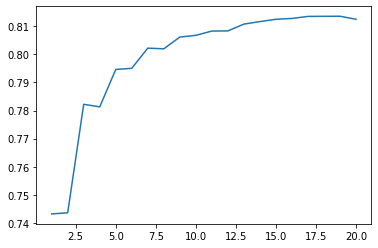

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def train_grid_search(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)
  grid_searcher = GridSearchCV(KNeighborsClassifier(),
                               param_grid={'n_neighbors': range(1, 21)},
                               cv=KFold(n_splits=5, random_state=10,shuffle=True))
  grid_searcher.fit(X_train,y_train)
  return grid_searcher.cv_results_['mean_test_score']

mean_test_scores = []
for i in range(100):
  X, y = make_moons(n_samples=1000, noise=0.5)
  mean_test_score = train_grid_search(X, y)
  mean_test_scores.append(mean_test_score)

mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

# Задание 3

In [ ]:
!pip install python-mnist
!mkdir dir_with_mnist_data_files
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!mv train-images-idx3-ubyte.gz dir_with_mnist_data_files
!mv train-labels-idx1-ubyte.gz dir_with_mnist_data_files

--2020-11-05 12:26:08--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.28.7.204, 104.28.6.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  2.48MB/s    in 4.2s    

2020-11-05 12:26:12 (2.24 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2020-11-05 12:26:12--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.28.7.204, 104.28.6.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K  --.-

In [ ]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
mndata = MNIST('./dir_with_mnist_data_files', gz=True)
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

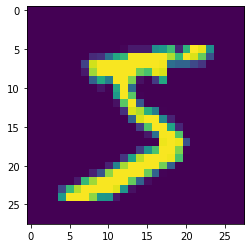

In [ ]:
plt.imshow(images[0].reshape(28, 28))

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузит данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20. Какой accuracy вы получаете на тестовой выборке?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [ ]:
grid_searcher_3 = KNeighborsClassifier(n_neighbors = 30)


In [ ]:
grid_searcher_3.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [ ]:
best_predictions = grid_searcher_3.predict(X_test)


In [ ]:
accuracy_score(y_test, best_predictions)

0.9598333333333333

# Задание 4 
Найдите примеры, которые были классифицированы не правильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?

AxesImage(54,36;334.8x217.44)
Number:  9


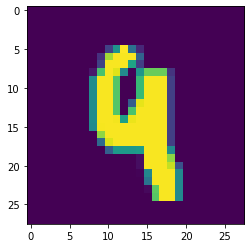

In [ ]:
print(plt.imshow(X_test[10].reshape(28,28)))
print('Number: ',best_predictions[10])

In [ ]:
kneighbors = grid_searcher_3.kneighbors([X_test[10]],n_neighbors=5)
print(labels[10])

NameError: ignored

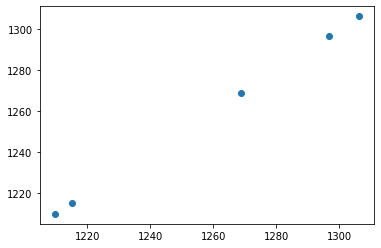

In [ ]:
plt.scatter(kneighbors[0], kneighbors[0])

AxesImage(54,36;334.8x217.44)
0
AxesImage(54,36;334.8x217.44)
8
AxesImage(54,36;334.8x217.44)
8
AxesImage(54,36;334.8x217.44)
3
AxesImage(54,36;334.8x217.44)
8
AxesImage(54,36;334.8x217.44)
1
AxesImage(54,36;334.8x217.44)
6
AxesImage(54,36;334.8x217.44)
8
AxesImage(54,36;334.8x217.44)
1
AxesImage(54,36;334.8x217.44)
1


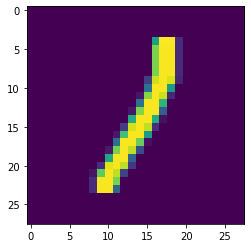

In [ ]:
for item in range(10):
  print(plt.imshow(X_test[item].reshape(28,28)))
  print(best_predictions[item])

AxesImage(54,36;334.8x217.44)
Number:  9


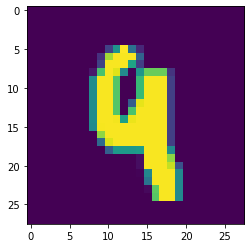

In [ ]:
print(plt.imshow(X_test[10].reshape(28,28)))
print('Number: ',best_predictions[10])

AxesImage(54,36;334.8x217.44)
Number:  8


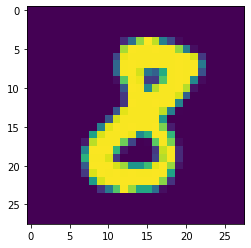

In [ ]:
print(plt.imshow(X_test[1].reshape(28,28)))
print('Number: ',best_predictions[1])

AxesImage(54,36;334.8x217.44)
Number:  8


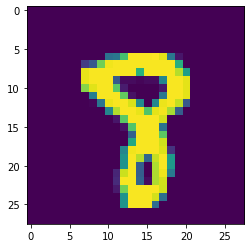

In [ ]:
print(plt.imshow(X_test[2].reshape(28,28)))
print('Number: ',best_predictions[2])

AxesImage(54,36;334.8x217.44)
Number:  3


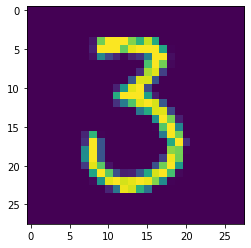

In [ ]:
print(plt.imshow(X_test[3].reshape(28,28)))
print('Number: ',best_predictions[3])

AxesImage(54,36;334.8x217.44)
Number:  8


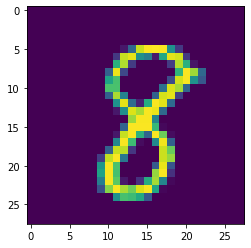

In [ ]:
print(plt.imshow(X_test[4].reshape(28,28)))
print('Number: ',best_predictions[4])

AxesImage(54,36;334.8x217.44)
Number:  1


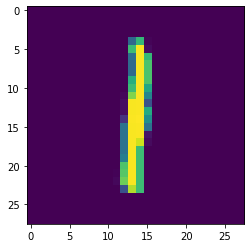

In [ ]:
print(plt.imshow(X_test[5].reshape(28,28)))
print('Number: ',best_predictions[5])

AxesImage(54,36;334.8x217.44)
Number:  6


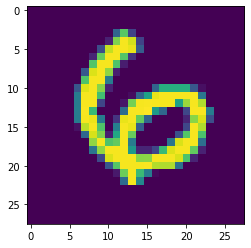

In [ ]:
print(plt.imshow(X_test[6].reshape(28,28)))
print('Number: ',best_predictions[6])

AxesImage(54,36;334.8x217.44)
Number:  9


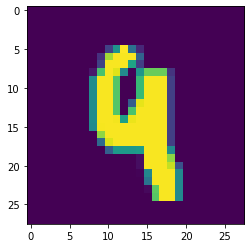

In [ ]:
print(plt.imshow(X_test[10].reshape(28,28)))
print('Number: ',best_predictions[10])